In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# <center> **Elbow Plot and PCA** <center>

In [10]:
data = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

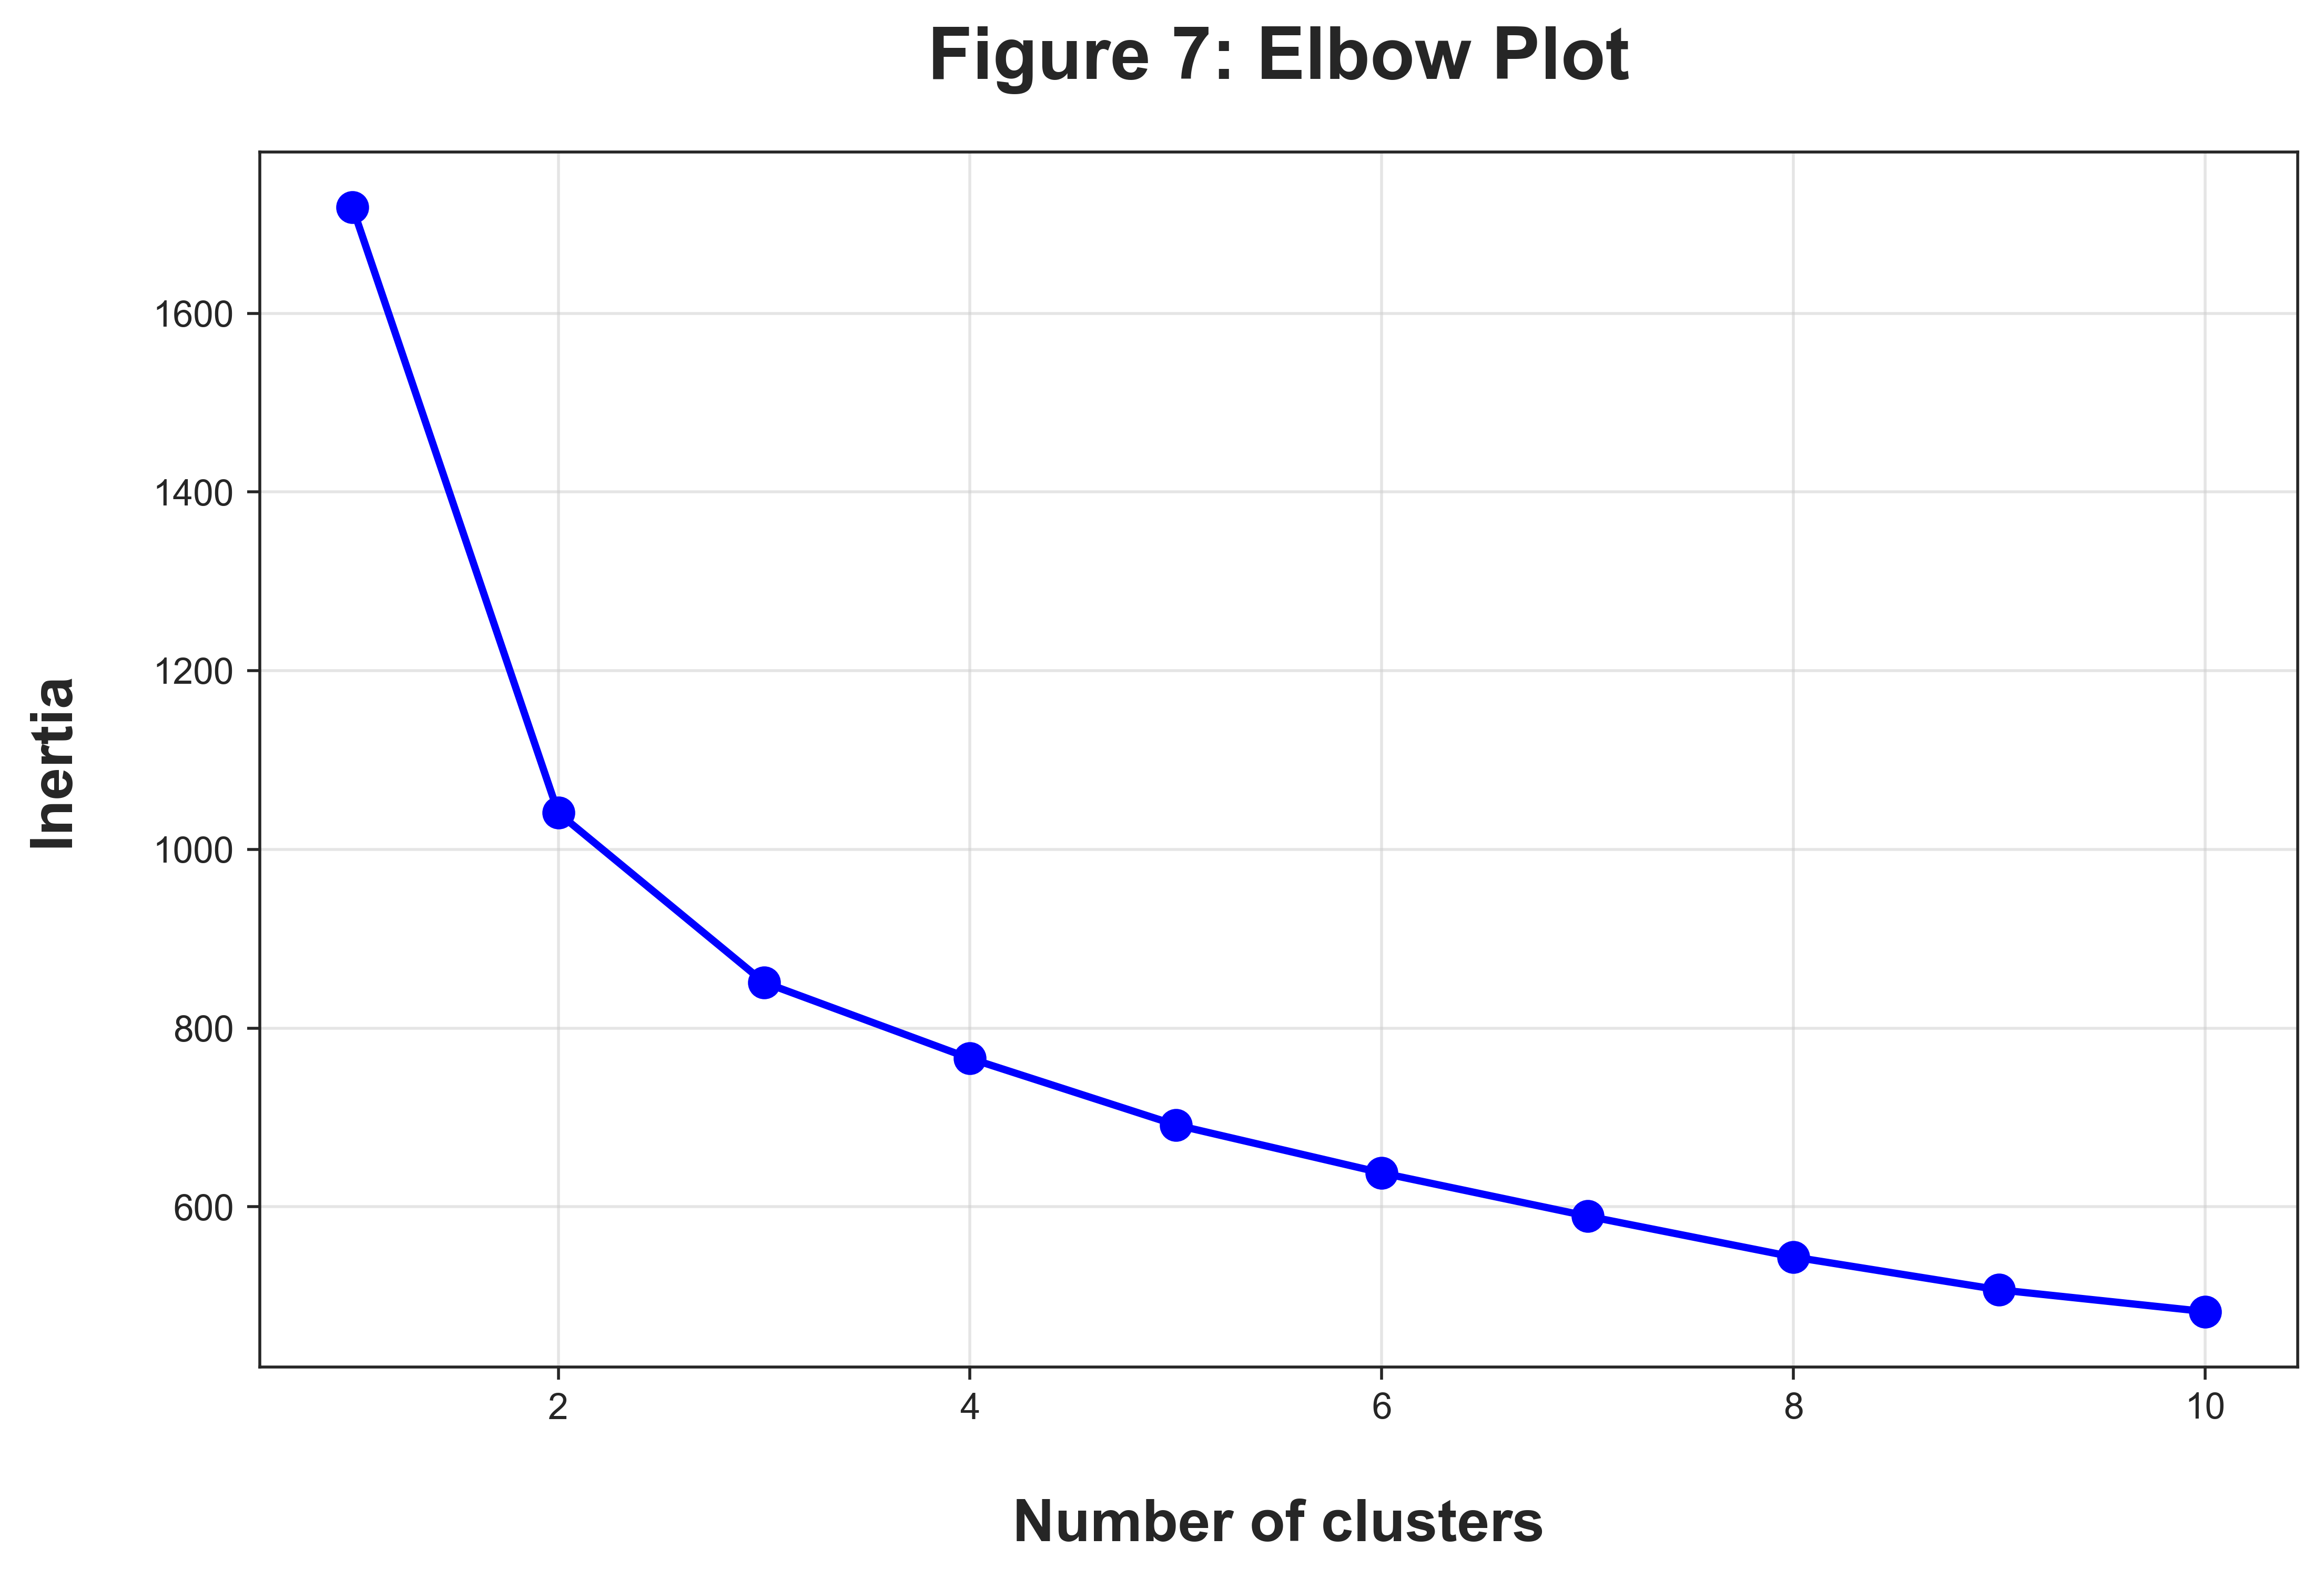

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = data.drop('class', axis=1)

# computing the within-cluster sum of square/inertia for different numbers of clusters
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)


# elbow plot
sns.set_style('darkgrid')
sns.set_style('ticks')
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(range(1, 11), inertias, 'bo-', markersize=8, lw=2)
plt.title('Figure 7: Elbow Plot', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Number of clusters', fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel('Inertia', fontsize=16, fontweight='bold', labelpad=20)
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()




In [12]:
# get raw values for each number of clusters
for i in range(1, 11):
    print(f'Inertia with {i} clusters: {inertias[i-1]}')
    

Inertia with 1 clusters: 1718.9081828525561
Inertia with 2 clusters: 1040.8273047349967
Inertia with 3 clusters: 851.0898160132274
Inertia with 4 clusters: 766.0355684808338
Inertia with 5 clusters: 691.6504400672236
Inertia with 6 clusters: 637.9407865163689
Inertia with 7 clusters: 589.5415486611689
Inertia with 8 clusters: 543.8798914916293
Inertia with 9 clusters: 507.08222834648706
Inertia with 10 clusters: 482.7952418165335


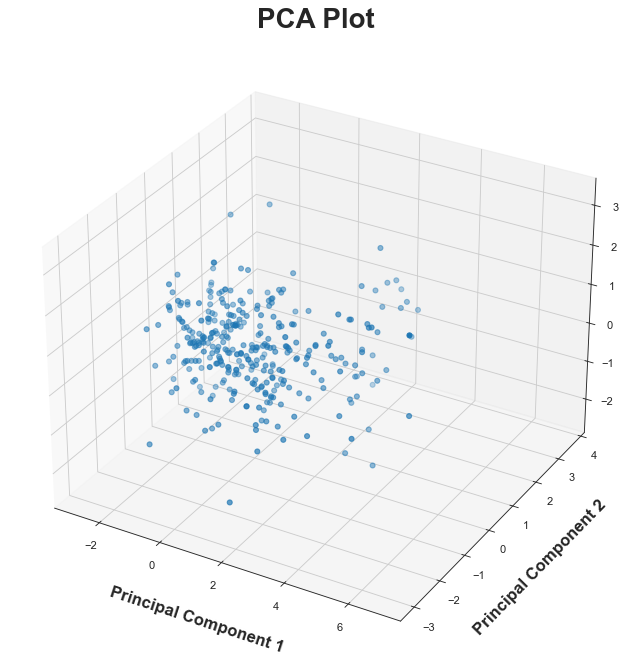

In [13]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2])
ax.set_title('PCA Plot', fontsize=25, fontweight='bold', pad=15)
ax.set_xlabel('Principal Component 1', fontsize=15, fontweight='bold', labelpad=15)
ax.set_ylabel('Principal Component 2', fontsize=15, fontweight='bold', labelpad=15)
ax.set_zlabel('Principal Component 3', fontsize=15, fontweight='bold', labelpad=15)
plt.show()


# <center> **K means Clustering** <center>

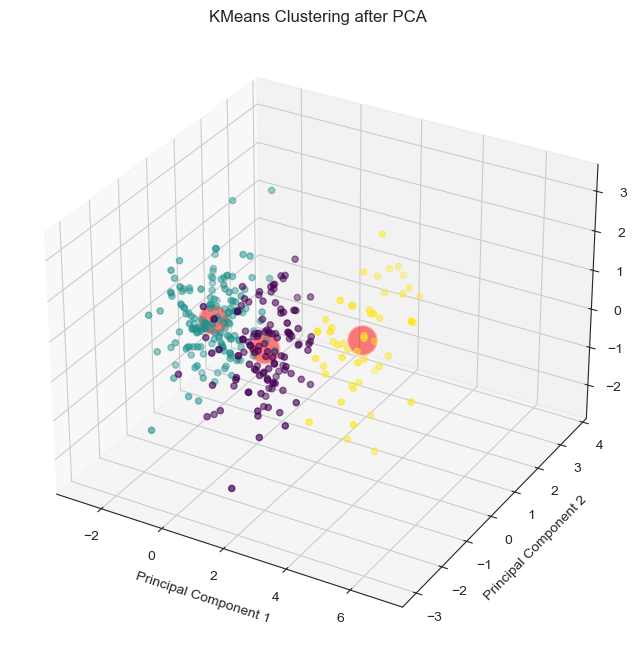

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=42)
kmeans.fit(pca_features) 

cluster_labels = kmeans.labels_

# making sure to retrieve the cluster centroids
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=cluster_labels, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='o', s=500, alpha=0.5, label='Centroids', edgecolors='w', linewidths=2) 
ax.set_title('KMeans Clustering after PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# important: playing around with the alpha to maximise visibility


In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_features, cluster_labels)


0.34375347038870213

In [16]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(pca_features, cluster_labels)


229.15194174158154

# <center> **K-Medoids With Different Distances**<center>

Silhouette Score for euclidean distance: 0.3413657013677737
Calinski-Harabasz Score for euclidean distance: 228.83116405900495
Silhouette Score for manhattan distance: 0.3021473406882184
Calinski-Harabasz Score for manhattan distance: 215.70885925925234
Silhouette Score for cosine distance: 0.5796473203636437
Calinski-Harabasz Score for cosine distance: 167.57045267769226
Silhouette Score for chebyshev distance: 0.3630314025324083
Calinski-Harabasz Score for chebyshev distance: 223.38609763537067
Silhouette Score for canberra distance: 0.16380199014203486
Calinski-Harabasz Score for canberra distance: 49.167522037002875
Silhouette Score for braycurtis distance: 0.40506208587128856
Calinski-Harabasz Score for braycurtis distance: 166.54480482155054
Silhouette Score for minkowski distance: 0.3413657013677737
Calinski-Harabasz Score for minkowski distance: 228.83116405900495


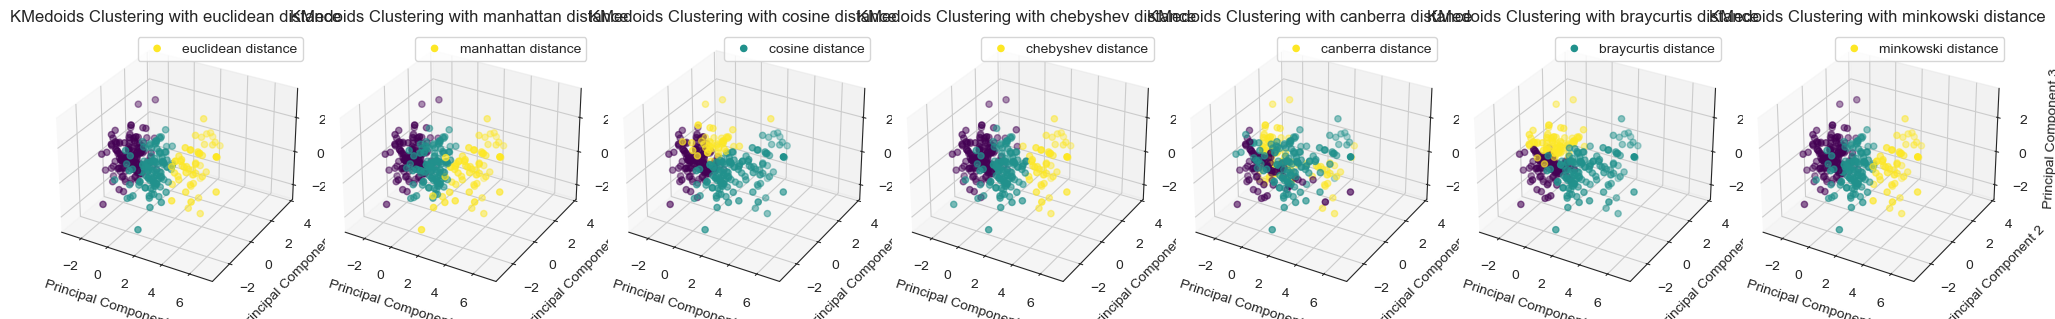

In [17]:
from sklearn_extra.cluster import KMedoids

pca_features = pd.DataFrame(pca_features)
X = pca_features

# List of different distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'canberra', 'braycurtis', 'minkowski']

n_clusters = 3

cluster_labels = {}

for metric in distance_metrics:
    kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, init='k-medoids++', random_state=42)
    kmedoids.fit(X)
    labels = kmedoids.labels_
    cluster_labels[metric] = labels
    
    silhouette_avg = silhouette_score(X, labels, metric=metric)
    print(f"Silhouette Score for {metric} distance: {silhouette_avg}")
    
    calinski_harabasz_avg = calinski_harabasz_score(X, labels)
    print(f"Calinski-Harabasz Score for {metric} distance: {calinski_harabasz_avg}")

# creating world's ugliest plot
fig = plt.figure(figsize=(20, 6))
for i, metric in enumerate(distance_metrics, 1):
    ax = fig.add_subplot(1, len(distance_metrics), i, projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=cluster_labels[metric], cmap='viridis', label=f"{metric} distance")
    ax.set_title(f"KMedoids Clustering with {metric} distance")
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend()

plt.tight_layout()
plt.show()



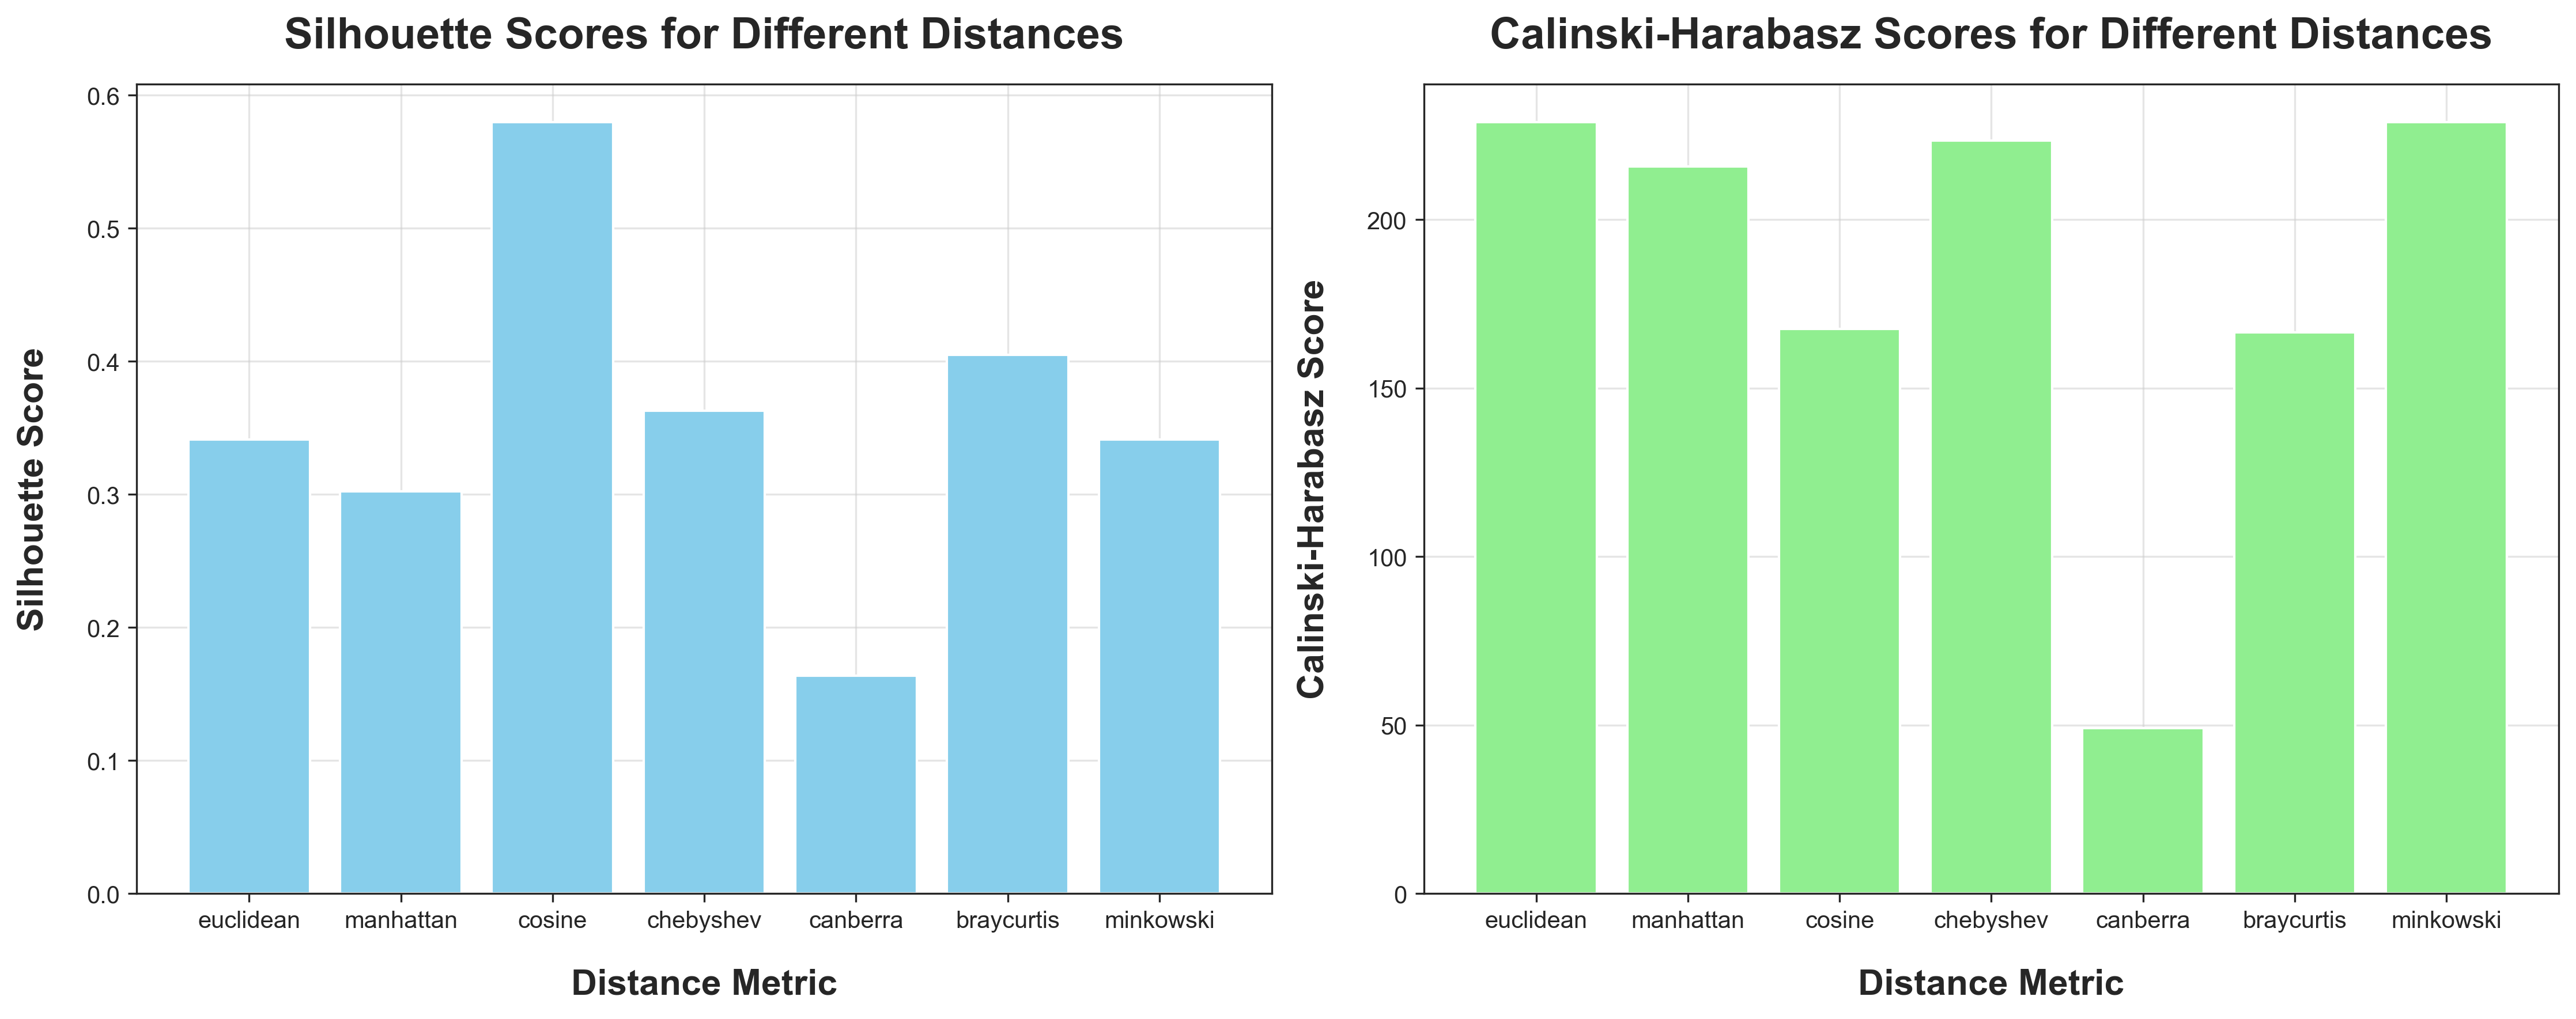

In [18]:
# plot the scores for each distance using a bar plot
silhouette_scores = [silhouette_score(X, cluster_labels[metric], metric=metric) for metric in distance_metrics]
calinski_harabasz_scores = [calinski_harabasz_score(X, cluster_labels[metric]) for metric in distance_metrics]

fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
ax[0].bar(distance_metrics, silhouette_scores, color='skyblue')
ax[0].set_title('Silhouette Scores for Different Distances', fontsize=18, fontweight='bold', pad=15)
ax[0].set_xlabel('Distance Metric', fontsize=15, fontweight='bold', labelpad=15)
ax[0].set_ylabel('Silhouette Score', fontsize=15, fontweight='bold', labelpad=15)
ax[0].grid(True, linestyle='-', alpha=0.5)

ax[1].bar(distance_metrics, calinski_harabasz_scores, color='lightgreen')
ax[1].set_title('Calinski-Harabasz Scores for Different Distances', fontsize=18, fontweight='bold', pad=15)
ax[1].set_xlabel('Distance Metric', fontsize=15, fontweight='bold', labelpad=15)
ax[1].set_ylabel('Calinski-Harabasz Score', fontsize=15, fontweight='bold', labelpad=15)
ax[1].grid(True, linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()



# <center> **Gaussian Mixture** <center> 

In [19]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(pca_features)

gmm_labels = gmm.predict(pca_features)

plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


KeyError: (slice(None, None, None), 0)

<Figure size 1000x800 with 0 Axes>

In [ ]:
silhouette_score(pca_features, gmm_labels)


0.34560036578957465

In [ ]:
calinski_harabasz_score(pca_features, gmm_labels)


216.69983897887548

# <center> **Hierachical Clustering** <center>

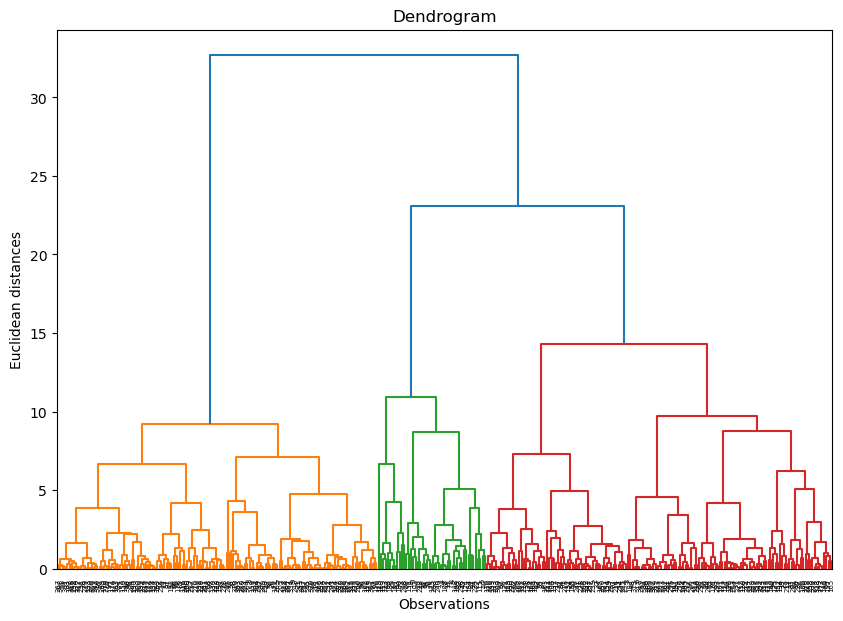

/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

X = pca_features

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hc_labels, cmap='viridis')
plt.title('Hierarchical Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
print(silhouette_score(pca_features, hc_labels))

print(calinski_harabasz_score(pca_features, hc_labels))

0.3078303282229497
185.38813970533636
